# Natural Language Processing

In [29]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Prepare data
### DATASET
https://www.kaggle.com/z5025122/yelp-csv

In [2]:
# Read data
yelp = pd.read_csv('./Dataset/yelp.csv')

In [3]:
# Head of data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# Info about dataset
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
# General statistics about dataset
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
# Create a new column called "text length"
yelp['text length'] = yelp['text'].apply(len)

In [7]:
# Set seaborn style to 'white'
sns.set_style('white')

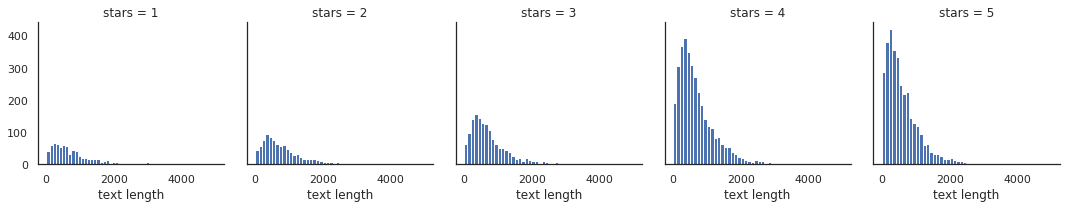

In [8]:
# Create FaceGrid
g = sns.FacetGrid(data=yelp, col='stars')
# Add histograms to FaceGrid
g.map(plt.hist, 'text length', bins = 50)

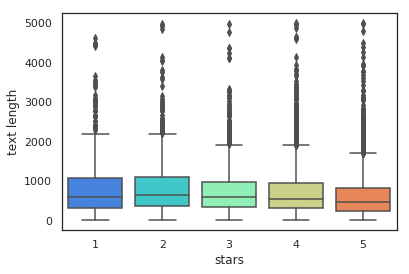

In [9]:
# Create a boxplot of text length for each star category
sns.boxplot(data = yelp, x = 'stars', y = 'text length', palette = 'rainbow')

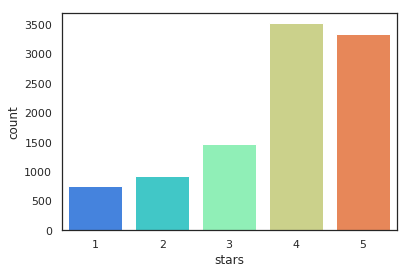

In [10]:
# Create a countplot of the number of occurrences for each type of star rating
sns.countplot(data = yelp, x = 'stars', palette = 'rainbow')

In [11]:
# Use groupby to get the mean values of the numerical columns
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
# Correlation between columns
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


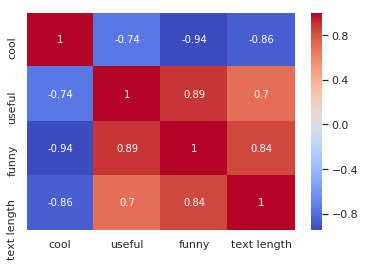

In [13]:
# Correlation between columns as heatmap
sns.heatmap(yelp.groupby('stars').mean().corr(), cmap='coolwarm', annot=True)

In [14]:
# Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [15]:
# Features and labels
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
# Create CountVectorizer and tranformed data
X = CountVectorizer().fit_transform(X)

In [17]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Create MultinomialNB model

In [18]:
# Create and train MultinomialNB model
nb = MultinomialNB().fit(X_train, y_train)

In [19]:
# Predictions
predictions = nb.predict(X_test)

In [20]:
# Show metrics for test dataset
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## Using Text Processing

In [21]:
# Create Pipeline
pipe = Pipeline([('Vectorizer', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Multinomial', MultinomialNB())])

In [23]:
# Features and labels
X = yelp_class['text']
y = yelp_class['stars']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [24]:
# Fit data to pipeline
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...=False, use_idf=True)), ('Multinomial', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [25]:
# Predictions
predictions = pipe.predict(X_test)

In [30]:
# Show metrics for test dataset
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



### Looks like Tf-Idf actually made things worse! That is it for this project.